In [83]:
%matplotlib inline

In [84]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import datapackage
import scipy.stats as st
from sklearn import datasets
import numpy as np
import seaborn as sns
import json
plt.style.use('seaborn')





In [85]:
global_suicide_data = "master.csv"
global_suicide_data = pd.read_csv(global_suicide_data)


In [114]:
tiffany_copy=pd.read_csv('master.csv')
tiffany_copy_df = pd.DataFrame(tiffany_copy)
tiffany_copy_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [116]:
tiffany_clean = tiffany_copy_df[['country','year','sex','age','suicides_no','population']].groupby(['country']).sum().sort_values(by=['suicides_no'], ascending=False)
tiffany_clean

,year,suicides_no,population
country,,,
Russian Federation,648648,1209742,3690802620
United States,744000,1034013,8054027201
Japan,744000,806902,3681024844
France,719820,329127,1670756775
Ukraine,672192,319950,1286469184
...,...,...,...
Maldives,240612,20,2900246
Antigua and Barbuda,647832,11,1990228
San Marino,72048,4,78825


In [126]:
tiff_top_five = tiffany_copy_df[tiffany_copy_df['country'].isin(['Russian Federation','United States','Japan','France','Ukraine'])]
tiff_top_five_df= pd.DataFrame(tiff_top_five)
tiff_top_five_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
9086,France,1985,male,75+ years,1522,1263200,120.49,France1985,0.741,"553,138,414,367",10765,G.I. Generation
9087,France,1985,male,55-74 years,2363,4471600,52.84,France1985,0.741,"553,138,414,367",10765,G.I. Generation
9088,France,1985,male,35-54 years,2752,6799400,40.47,France1985,0.741,"553,138,414,367",10765,Silent
9089,France,1985,male,25-34 years,1492,4240100,35.19,France1985,0.741,"553,138,414,367",10765,Boomers
9090,France,1985,female,75+ years,670,2434600,27.52,France1985,0.741,"553,138,414,367",10765,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27216,United States,2015,female,15-24 years,1132,21633813,5.23,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27217,United States,2015,female,75+ years,540,11778666,4.58,United States2015,NaN,"18,120,714,000,000",60387,Silent
27218,United States,2015,male,5-14 years,255,21273987,1.20,United States2015,NaN,"18,120,714,000,000",60387,Generation Z


In [127]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=tiff_top_five['suicides_no'].quantile([.25,.50,.75])
iqr=quartiles[.75]-quartiles[.25] #iqr = Q3-Q1
min_outlier_value = quartiles[.25] - (1.5*iqr)
max_outlier_value = quartiles[.75] + (1.5*iqr)
outliers_values =tiff_top_five.loc[(tiff_top_five['suicides_no'] < min_outlier_value)|(tiff_top_five['suicides_no'] > max_outlier_value)]
print(f'Potential outliers are values below {np.round(min_outlier_value, decimals =2)} and greater than {np.round(max_outlier_value, decimals =2)}.')

Potential outliers are values below -2882.62 and greater than 5908.38.


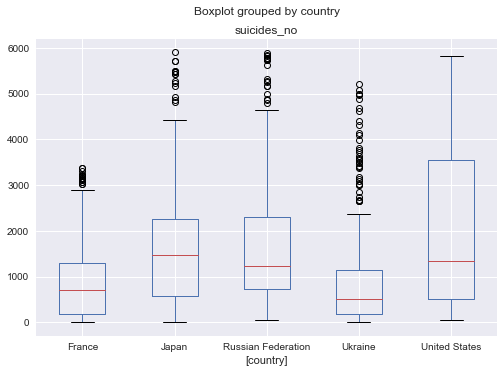

In [130]:
tiff_top_five_no_outliers=tiff_top_five.loc[tiff_top_five['suicides_no']<max_outlier_value]
tiff_top_five_no_outliers.boxplot(column=['suicides_no'],by=['country'])

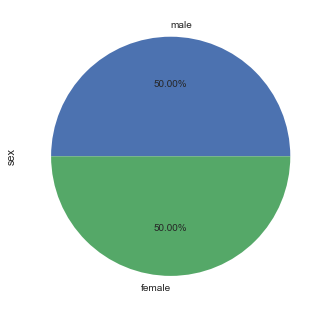

In [134]:
# Generate a pie plot showing the distribution of female versus male 
#using pandas
pie_chart=tiff_top_five_df['sex'].value_counts().plot.pie(autopct='%1.2f%%')
pie_chart

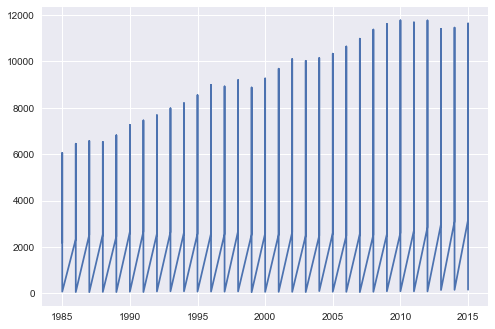

In [162]:
# Scatter plot of year versus number of suicides
tiff_usa= tiff_top_five.loc[tiff_top_five['country']=='United States']
tiff_usa
plt.figure(figsize=(10,10))
plt.plot(tiff_usa['year'] ,tiff_usa['suicides_no'])


In [67]:
global_suicide_data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
global_suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
global_suicide_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
#clean columns
global_suicide_data=global_suicide_data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age'
                     ,'suicides_no':'SuicidesNo','population':'Population',
                      'suicides/100k pop':'Suicides/100kPop','country-year':'Country/Year',
                      'HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYear($)',
                      'gdp_per_capita ($)':'GdpPerCapital($)','generation':'Generation'})

In [8]:
#checking for null values
global_suicide_data.isnull().any()

Country             False
Year                False
Gender              False
Age                 False
SuicidesNo          False
Population          False
Suicides/100kPop    False
Country/Year        False
HDIForYear           True
GdpForYear($)       False
GdpPerCapital($)    False
Generation          False
dtype: bool

In [9]:
#count amount of null values
global_suicide_data.isnull().sum()

Country                 0
Year                    0
Gender                  0
Age                     0
SuicidesNo              0
Population              0
Suicides/100kPop        0
Country/Year            0
HDIForYear          19456
GdpForYear($)           0
GdpPerCapital($)        0
Generation              0
dtype: int64

In [10]:
global_suicide_data.drop('HDIForYear', axis=1, inplace = True)

In [11]:
global_suicide_data.drop('Country/Year', axis=1, inplace=True)

In [12]:
global_suicide_data = global_suicide_data[global_suicide_data.Year >= 2000]

In [13]:
global_suicide_data["Year"].value_counts()

2009    1068
2001    1056
2010    1056
2011    1032
2007    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2004    1008
2005    1008
2012     972
2013     960
2014     936
2015     744
2016     160
Name: Year, dtype: int64

In [14]:
#here we have dropped unneeded columns, as well as filtered the data
global_suicide_data.shape

(16168, 10)

In [82]:
#create new data frame grouped by year to check
yearlyStats = global_suicide_data.groupby('Year').sum()
yearlyStats.sort()

KeyError: 'Year'

In [16]:
#Checkking countries for bad values
countryStats = global_suicide_data.groupby('Country').sum()
countryStats

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Country,,,,,
Albania,264660,956,30706067,446.38,388020
Antigua and Barbuda,337188,9,1164590,146.90,2200824
Argentina,385440,48927,585500629,1955.73,1780188
Armenia,357492,1004,43460973,557.41,499376
Aruba,288792,84,1104162,1172.54,3601524
...,...,...,...,...,...
United Arab Emirates,144540,622,36502275,94.89,3035664
United Kingdom,385440,68815,925960697,1299.77,8146224
United States,385440,575514,4508454430,2485.52,9537960


In [17]:
#dropping countries with bad data
country_1 = global_suicide_data['Country'] != 'Antigua'
country_2 = global_suicide_data['Country'] != 'Barbados'
country_3 = global_suicide_data['Country'] != 'Grenada'
country_4 = global_suicide_data['Country'] != 'Maldives'
country_5 = global_suicide_data['Country'] != 'Montenegro'
country_6 = global_suicide_data['Country'] != 'Saint Vincent'

country_all = country_1 | country_2 | country_3 | country_4 | country_5 | country_6
global_suicide_data= global_suicide_data[country_all]

In [18]:
#removing 2016 due to being incomplete
global_suicide_data = global_suicide_data[global_suicide_data.Year != 2016]

In [19]:
global_suicide_data.shape

(16008, 10)

In [20]:
global_suicide_data.sample(10)

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation
17254,Netherlands,2000,female,25-34 years,67,1212404,5.53,"412,807,259,996",27644,Generation X
26294,Ukraine,2005,male,5-14 years,49,2506950,1.95,"86,142,018,069",1917,Millenials
23397,South Africa,2005,male,25-34 years,123,4115079,2.99,"257,671,413,751",5914,Generation X
1336,Aruba,2004,female,35-54 years,0,17769,0.00,"2,228,279,330",24133,Boomers
26668,United Kingdom,2001,male,25-34 years,723,4243590,17.04,"1,621,510,004,318",29179,Generation X
8322,El Salvador,2012,male,15-24 years,100,618195,16.18,"21,386,153,000",3806,Millenials
20482,Republic of Korea,2006,male,75+ years,722,466922,154.63,"1,011,797,457,139",21753,Silent
25234,Thailand,2010,male,15-24 years,387,4905031,7.89,"341,105,009,515",5707,Millenials
27436,Uruguay,2005,male,75+ years,55,71161,77.29,"17,362,857,684",5655,Silent
20480,Republic of Korea,2005,female,5-14 years,20,3223612,0.62,"898,137,194,716",19460,Millenials


In [21]:
global_suicide_data.Country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
       'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania',
       'Russian Federation', 'Saint Lucia

In [22]:

#create lists of countries per continent
europe = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'] 
asia = ['Armenia', 'Bahrain', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']
northamerica = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'United States']
southamerica =  ['Argentina', 'Aruba', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Trinidad and Tobago', 'Uruguay']
africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa'] 
australiaoceania = ['Australia', 'Fiji', 'Kiribati', 'New Zealand']

In [23]:
#move these to a dictionary of continents
continents = {country: 'Asia' for country in asia}
continents.update({country: 'Europe' for country in europe})
continents.update({country: 'Africa' for country in africa})
continents.update({country: 'North_America' for country in northamerica})
continents.update({country: 'South_America' for country in southamerica})
continents.update({country: 'Australia_Oceania' for country in australiaoceania})

In [24]:
global_suicide_data.Country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
       'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania',
       'Russian Federation', 'Saint Lucia

In [25]:
#map continents to countries
global_suicide_data['Continent'] = global_suicide_data['Country'].map(continents)

In [26]:
global_suicide_data.shape

(16008, 11)

In [27]:
data_per_year = global_suicide_data.groupby('Year').sum()
data_per_year['SuicidesNo']

Year
2000    255832
2001    250652
2002    256095
2003    256079
2004    240861
2005    234375
2006    233361
2007    233408
2008    235447
2009    243487
2010    238702
2011    236484
2012    230160
2013    223199
2014    222984
2015    203640
Name: SuicidesNo, dtype: int64

In [28]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.close()

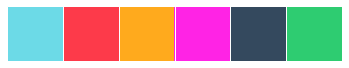

In [29]:
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

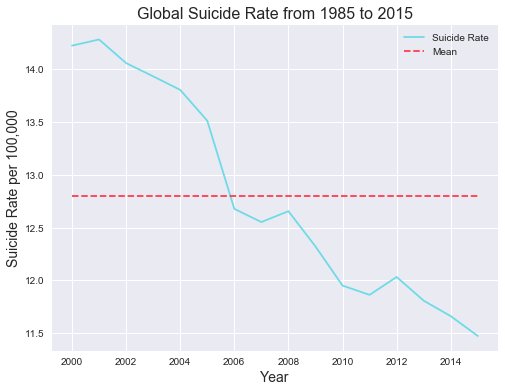

In [30]:
curr = global_suicide_data.dropna().groupby(['Year']).sum().reset_index()
curr['per_100k'] = curr['SuicidesNo'] * 100000 / curr['Population']
plt.figure(figsize = (8,6))
plt.plot(curr['Year'], curr['per_100k'], label = "Suicide Rate")
plt.plot(curr['Year'], [curr['per_100k'].mean()] * len(curr), '--', label = "Mean")
plt.title("Global Suicide Rate from 1985 to 2015", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Suicide Rate per 100,000", fontsize = 14)
plt.legend()
plt.show()


In [31]:
#group data by continent
data_per_continent = global_suicide_data.groupby('Continent').mean()
data_per_continent

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Continent,,,,,
Africa,2007.729167,14.770833,1.280232e+06,6.163090,8369.833333
Asia,2007.430380,307.735584,2.075328e+06,10.571902,20760.978903
Australia_Oceania,2006.547619,86.882937,7.198890e+05,9.840972,27726.380952
Europe,2007.324232,259.448379,1.537148e+06,15.605151,28637.912969
North_America,2007.281853,242.648970,2.333570e+06,6.508729,14040.142857
South_America,2007.049383,148.495370,2.391359e+06,12.942932,8610.216049


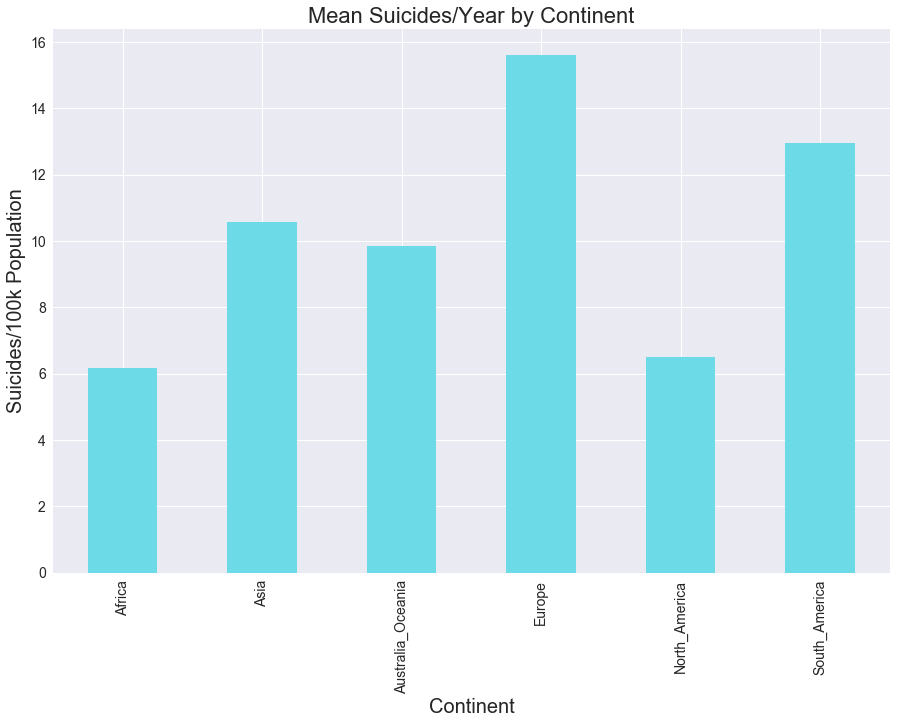

In [32]:
#plot mean suicides/year by continent
ax = data_per_continent['Suicides/100kPop'].plot(kind='bar', figsize=(15, 10), fontsize=14)
plt.title('Mean Suicides/Year by Continent', fontsize = 22)
ax.set_xlabel("Continent", fontsize=20)
ax.set_ylabel("Suicides/100k Population", fontsize=20)
plt.show()

In [33]:

dftesting = global_suicide_data[['Continent','Year','Suicides/100kPop']]
dftesting

,Continent,Year,Suicides/100kPop
132,Europe,2000,7.33
133,Europe,2000,5.64
134,Europe,2000,5.29
135,Europe,2000,4.02
136,Europe,2000,2.27
...,...,...,...
27815,Asia,2014,2.96
27816,Asia,2014,2.58
27817,Asia,2014,2.17
27818,Asia,2014,1.67


In [34]:
dfAgg = dftesting.groupby(['Continent','Year'],sort=True,as_index=False)['Suicides/100kPop'].mean()

<function matplotlib.pyplot.show(*args, **kw)>

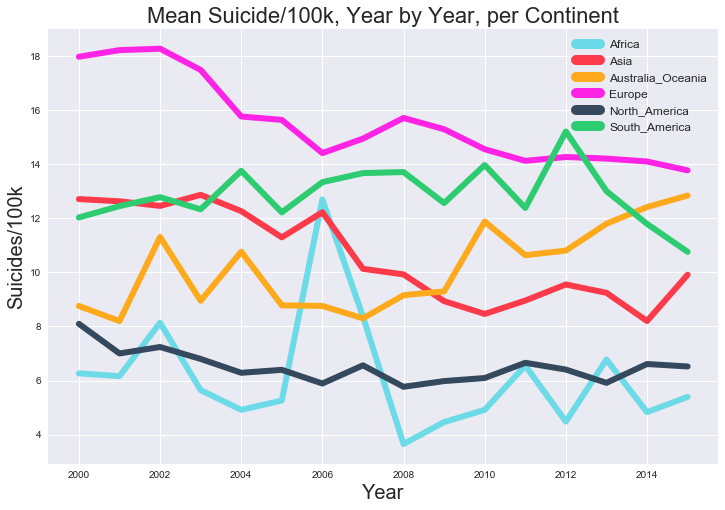

In [35]:
#plotting mean suicide/100k by continent, year by year
by_cont = dfAgg.groupby('Continent')

for name, group in by_cont:
    plt.plot(group['Year'], group['Suicides/100kPop'], label=name, linewidth=6.0)
    

plt.title('Mean Suicide/100k, Year by Year, per Continent', fontsize = 22)
plt.ylabel('Suicides/100k', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
leg = plt.legend(fontsize = 12)
for line in leg.get_lines():
    line.set_linewidth(10)
plt.show

Text(0.5, 0, 'Country')

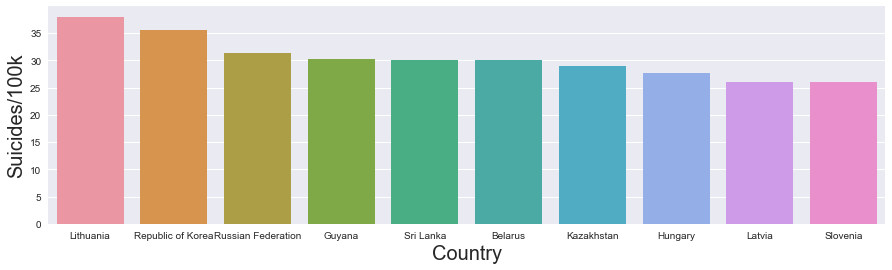

In [36]:
#plotting countries with the highest suicide rate
data_suicide_mean = global_suicide_data['Suicides/100kPop'].groupby(global_suicide_data.Country).mean().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(data_suicide_mean.head(10).index,data_suicide_mean.head(10))
plt.ylabel('Suicides/100k', fontsize = 20)
plt.xlabel('Country', fontsize = 20)

In [37]:
#creating sub frame for USA only 
dfUSA = global_suicide_data[global_suicide_data.Country == 'United States']
usa_by_year = dfUSA.groupby('Year').sum()

In [38]:
dfUSA.corr(method ='pearson')

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Year,1.000000,0.120717,0.092452,0.062626,0.982037
SuicidesNo,0.120717,1.000000,0.605890,0.674699,0.116494
Population,0.092452,0.605890,1.000000,-0.035493,0.090906
Suicides/100kPop,0.062626,0.674699,-0.035493,1.000000,0.058545
GdpPerCapital($),0.982037,0.116494,0.090906,0.058545,1.000000


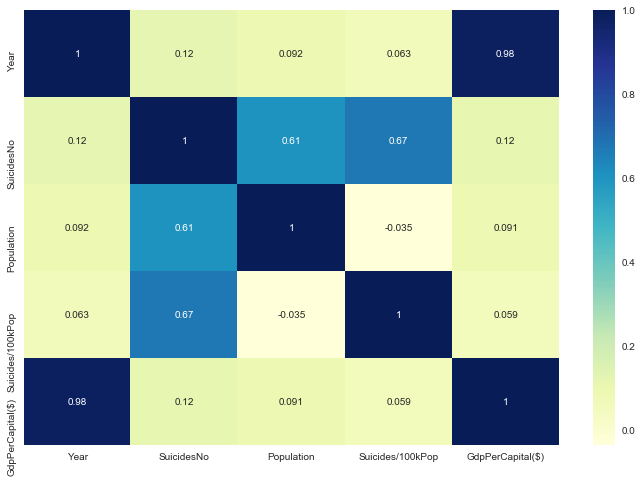

In [39]:
sns.heatmap(dfUSA.corr(method = 'pearson'),cmap='YlGnBu',annot=True)

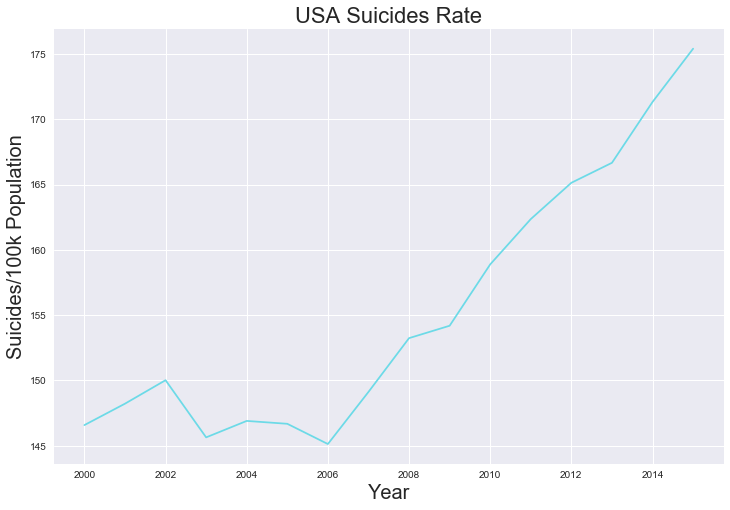

In [40]:
usa_by_year['Suicides/100kPop'].plot()
plt.title('USA Suicides Rate', fontsize = 22)
plt.ylabel('Suicides/100k Population', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()

In [41]:

#new data frame with only data from 2015
df2015 = global_suicide_data[global_suicide_data.Year == 2015]

In [42]:
df2015 = df2015[['Country','Suicides/100kPop','GdpPerCapital($)', 'Continent']]

In [58]:
df2015check = df2015.groupby('Country').sum()
df2015check

,Suicides/100kPop,GdpPerCapital($)
Country,,
Antigua and Barbuda,15.62,178236
Argentina,112.13,179772
Armenia,45.28,45300
Australia,154.18,727872
Austria,194.62,557808
...,...,...
Turkmenistan,28.48,87912
Ukraine,244.72,27072
United Kingdom,86.74,566880


In [59]:
df2015check['GdpPerCapital($)'] = df2015check['GdpPerCapital($)'].div(2)

In [60]:
df2015check.reset_index(level=0, inplace=True)
df2015check

,Country,Suicides/100kPop,GdpPerCapital($)
0,Antigua and Barbuda,15.62,89118.0
1,Argentina,112.13,89886.0
2,Armenia,45.28,22650.0
3,Australia,154.18,363936.0
4,Austria,194.62,278904.0
...,...,...,...
57,Turkmenistan,28.48,43956.0
58,Ukraine,244.72,13536.0
59,United Kingdom,86.74,283440.0
60,United States,175.41,362322.0


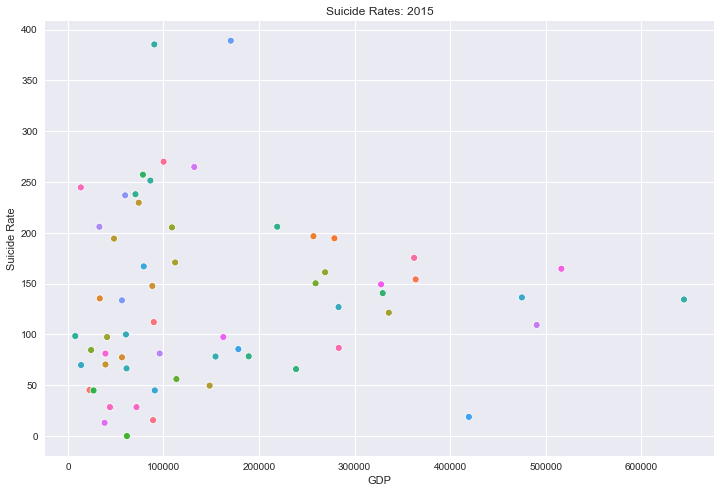

In [47]:
sns.scatterplot(x='GdpPerCapital($)', y='Suicides/100kPop', data=df2015check, hue='Country',legend=False) 
plt.title('Suicide Rates: 2015')
plt.ylabel('Suicide Rate')
plt.xlabel('GDP')
plt.show()
# Checking data for rates

In [48]:
df2015.shape

(744, 4)

In [49]:
dfcont = df2015.groupby(['Continent','Country'],sort=True,as_index=False)['Suicides/100kPop','GdpPerCapital($)'].sum()

/Users/mathluvacoding/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [50]:
dfcont['GdpPerCapital($)'] = dfcont['GdpPerCapital($)'].div(2)
dfcont.reset_index(level=0, inplace=True)

In [ ]:
dfcont

In [ ]:
#plot suicide rate vs gdp
plt.figure(figsize=(20,16))
sns.scatterplot(x='GdpPerCapital($)',s=300, y='Suicides/100kPop',data=dfcont, hue='Continent') 
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('GDP ($)', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=1, prop={'size': 30})


plt.show()

In [ ]:
#regression plot for suicide rates vs gdp
plt.figure(figsize=(20,16))
sns.regplot(x="GdpPerCapital($)", y="Suicides/100kPop", data=dfcont, color = 'b')
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('GDP($)', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
curr = global_suicide_data.groupby(['Age']).sum().reset_index()
plt.bar(curr['Age'].values, curr['SuicidesNo'].values * 100000 / curr['Population'].values)
plt.title('Global Suicide Count per Age Group', fontsize = 14)
plt.xlabel('Age Group', fontsize = 14)
plt.ylabel('Suicide Count per 100,000', fontsize = 14)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
curr = global_suicide_data.groupby(['Year', 'Age']).sum().reset_index()
plt.figure(figsize = (8,6))
for age_group in curr['Age'].unique():
    sub = curr[curr['Age'] == age_group]
    sub['per_100k'] = sub['SuicidesNo'] * 100000 / sub['Population']
    plt.plot(sub['Year'], sub['per_100k'], label = age_group)

plt.title('Suicide count from 1985 - 2015', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicide Count per 100,000', fontsize = 14)
plt.legend()
plt.show()



In [ ]:
curr = global_suicide_data[(global_suicide_data['SuicidesNo'] != np.NaN) & (global_suicide_data['Population'] != np.NaN)]
curr = global_suicide_data.groupby(['Year', 'Gender']).sum().reset_index()
plt.figure(figsize = (8,6))
for sex in curr['Gender'].unique():
    sub = curr[curr['Gender'] == sex]
    sub['per_100k'] = sub['SuicidesNo'] * 100000 / sub['Population']
    plt.plot(sub['Year'], sub['per_100k'], label = sex)

plt.title('Suicide count based on Gender', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicide count per 100,000', fontsize = 14)
plt.ylim(bottom = 0)
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for sex in curr['Gender'].unique():
    sub = curr[curr['Gender'] == sex]
    plt.plot(sub['Year'], sub['SuicidesNo'], label = sex)

plt.title('Suicide count based on Gender', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Total Suicide Count', fontsize = 14)
plt.ylim(bottom = 0)
plt.legend()
plt.show()

In [ ]:

# Generate pie plot showing the distribution of female versus male suicide percent
suicide_gender = global_suicide_data.groupby("Gender")

gender_suicide_percent = 100*suicide_gender['SuicidesNo'].sum()/global_suicide_data['SuicidesNo'].sum()
gender_suicide_percent

In [ ]:

# Pie Plot
suicide_vs_age = gender_suicide_percent.plot(kind='pie', y='Gender', title="Female Vs. Male Suicide Rate Percent (2000-2015)",\
                startangle=100, autopct='%1.1f%%',shadow=True, fontsize=20, colors =["r","b"],legend =False, explode =(0, 0.1))
plt.tight_layout()

plt.show()